In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="mostafa_mh2",
  password="bvncxz62",
    database="transfermarket"
)

In [3]:
mydb

In [4]:
mycursor = mydb.cursor()

# Execute SQL query to retrieve table names
mycursor.execute("SHOW TABLES")

# Fetch all table names
tables = mycursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

clubs
clubs_season
competitions
national
players
players_season
transfers


In [5]:
join_query = "select players.id as ID, players.age as AGE,players.height as HEIGHT,players_season.* from players right join players_season on players.id=players_season.player_id;"


In [6]:
mycursor.execute(join_query)
joined_data = mycursor.fetchall()

In [7]:
column_names = [i[0] for i in mycursor.description]

df = pd.DataFrame(joined_data, columns=column_names)

mydb.close()

In [8]:
df

,ID,AGE,HEIGHT,id,player_id,season,club_id,squad,appearance,point_per_goal,...,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,competition,age,position,height,current_international,agent
0,305686,26.00,185.00,1,305686,2022,NaN,33.00,24.00,1.58,...,NaN,NaN,NaN,586.00,None,25.00,Central Midfield,185.00,None,None
1,305686,26.00,185.00,2,305686,2021,NaN,1.00,0.00,0.00,...,NaN,NaN,NaN,NaN,None,25.00,Central Midfield,185.00,None,None
2,305686,26.00,185.00,3,305686,2021,NaN,25.00,22.00,1.41,...,NaN,NaN,809.00,809.00,None,25.00,Central Midfield,185.00,None,None
3,305686,26.00,185.00,4,305686,2020,NaN,3.00,2.00,0.00,...,NaN,NaN,NaN,77.00,None,25.00,Central Midfield,185.00,None,None
4,305686,26.00,185.00,5,305686,2020,NaN,2.00,2.00,1.50,...,NaN,NaN,NaN,99.00,None,25.00,Central Midfield,185.00,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257082,5578,42.00,185.00,257083,5578,2000,595.00,2.00,2.00,1.50,...,2.00,NaN,NaN,180.00,None,42.00,Goalkeeper,185.00,None,None
257083,5578,42.00,185.00,257084,5578,1999,595.00,20.00,3.00,0.33,...,5.00,NaN,NaN,270.00,None,42.00,Goalkeeper,185.00,None,None
257084,5578,42.00,185.00,257085,5578,1999,595.00,1.00,0.00,0.00,...,NaN,NaN,NaN,NaN,None,42.00,Goalkeeper,185.00,None,None
257085,5578,42.00,185.00,257086,5578,1998,595.00,6.00,1.00,0.00,...,1.00,NaN,NaN,70.00,None,42.00,Goalkeeper,185.00,None,None


In [9]:
df.columns

Index(['ID', 'AGE', 'HEIGHT', 'id', 'player_id', 'season', 'club_id', 'squad',
       'appearance', 'point_per_goal', 'goals', 'assits', 'own_goals',
       'yellow_card', 'second_yellow_card', 'red_card', 'penalty_goals',
       'goals_conceded', 'clean_sheets', 'minutes_per_goal', 'minutes_played',
       'competition', 'age', 'position', 'height', 'current_international',
       'agent'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257087 entries, 0 to 257086
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     257087 non-null  object 
 1   AGE                    256898 non-null  float64
 2   HEIGHT                 252103 non-null  float64
 3   id                     257087 non-null  int64  
 4   player_id              257087 non-null  object 
 5   season                 257087 non-null  int64  
 6   club_id                119199 non-null  float64
 7   squad                  257087 non-null  float64
 8   appearance             257087 non-null  float64
 9   point_per_goal         257087 non-null  float64
 10  goals                  81725 non-null   float64
 11  assits                 67817 non-null   float64
 12  own_goals              4757 non-null    float64
 13  yellow_card            109297 non-null  float64
 14  second_yellow_card     8336 non-null

In [11]:
df.shape

(257087, 27)

In [12]:
df.isna().sum()

ID                            0
AGE                         189
HEIGHT                     4984
id                            0
player_id                     0
season                        0
club_id                  137888
squad                         0
appearance                    0
point_per_goal                0
goals                    175362
assits                   189270
own_goals                252330
yellow_card              147790
second_yellow_card       248751
red_card                 247932
penalty_goals            244923
goals_conceded           237765
clean_sheets             242936
minutes_per_goal         175440
minutes_played            26395
competition              257087
age                         328
position                      0
height                     4984
current_international    224600
agent                    181564
dtype: int64

In [13]:
df.drop(['player_id','id','season','age','club_id','competition','current_international','agent','height'],axis=1,inplace=True)

In [14]:
df.isna().sum()

ID                         0
AGE                      189
HEIGHT                  4984
squad                      0
appearance                 0
point_per_goal             0
goals                 175362
assits                189270
own_goals             252330
yellow_card           147790
second_yellow_card    248751
red_card              247932
penalty_goals         244923
goals_conceded        237765
clean_sheets          242936
minutes_per_goal      175440
minutes_played         26395
position                   0
dtype: int64

In [15]:
df['AGE'].fillna(int(df['AGE'].mean()),inplace=True)
mean_height_by_position = df.groupby('position')['HEIGHT'].transform('mean')
df['HEIGHT'].fillna(mean_height_by_position, inplace=True)

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.isna().sum()

ID                    0
AGE                   0
HEIGHT                0
squad                 0
appearance            0
point_per_goal        0
goals                 0
assits                0
own_goals             0
yellow_card           0
second_yellow_card    0
red_card              0
penalty_goals         0
goals_conceded        0
clean_sheets          0
minutes_per_goal      0
minutes_played        0
position              0
dtype: int64

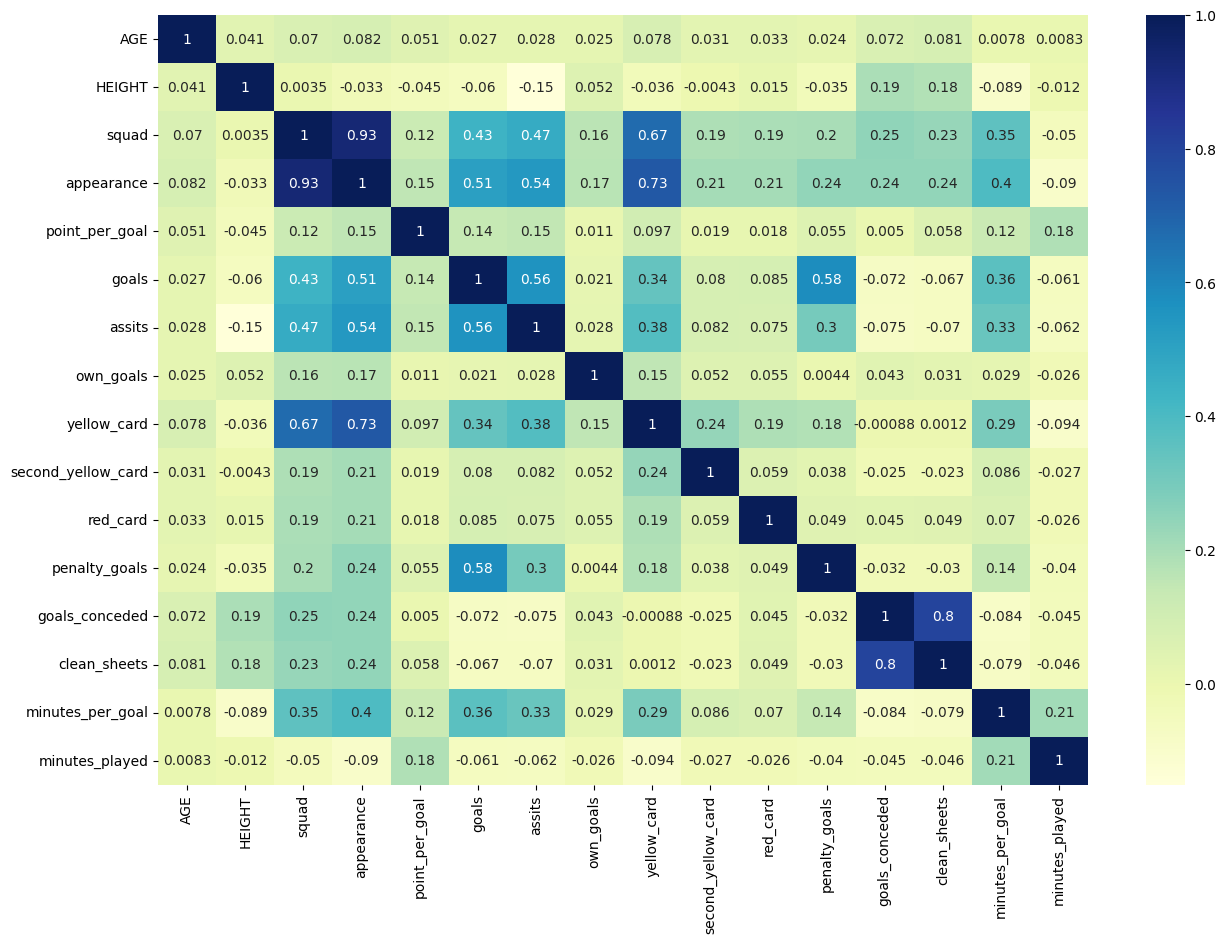

In [18]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [19]:
df.drop(['squad'],axis=1,inplace=True)

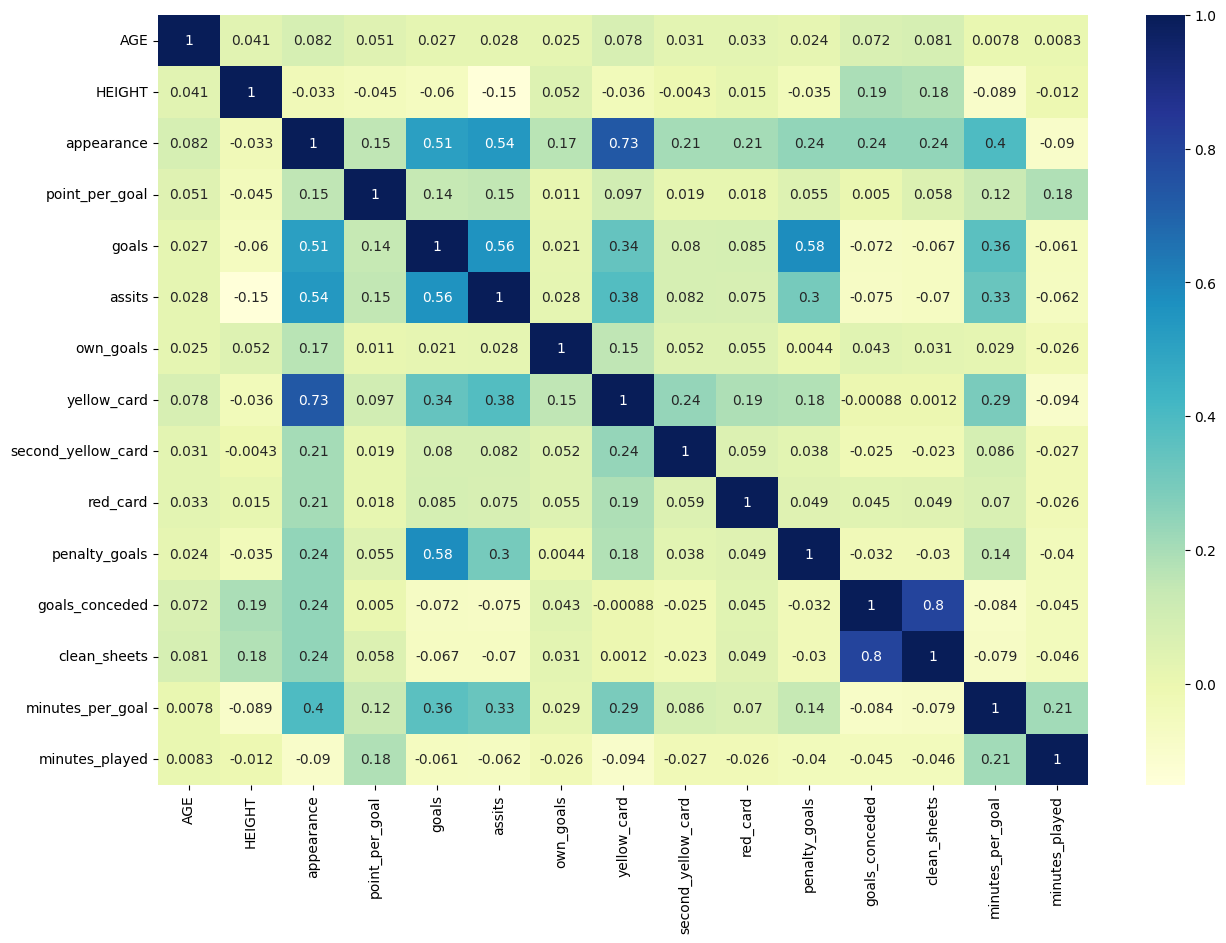

In [20]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

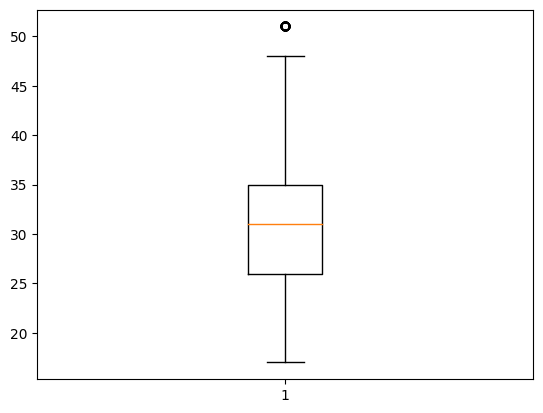

In [21]:
fig, ax = plt.subplots()
ax.boxplot(df['AGE'])
plt.show()

In [22]:
len(df[df['AGE']>48])

66

In [23]:
df=df[df['AGE']<=48]

In [24]:
df.drop(['AGE'],axis=1,inplace=True)

In [25]:
df['G/A']=df['goals']/df['appearance']
df['A/A']=df['assits']/df['appearance']
df['own/A']=df['own_goals']/df['appearance']
df['Y/A']=df['yellow_card']/df['appearance']
df['S_Y/A']=df['second_yellow_card']/df['appearance']
df['R/A']=df['red_card']/df['appearance']

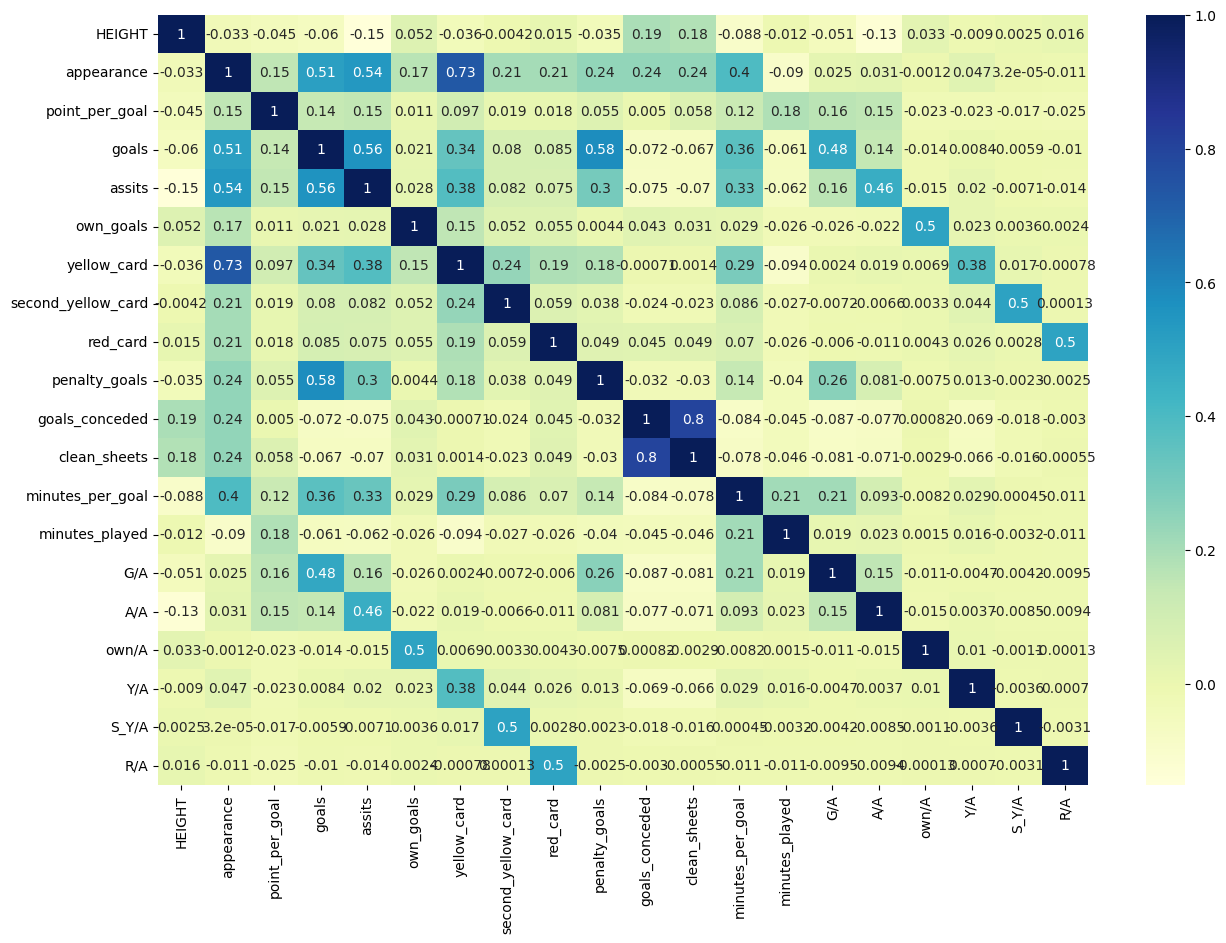

In [26]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [27]:
df.drop(['appearance','goals_conceded','clean_sheets'],axis=1,inplace=True)

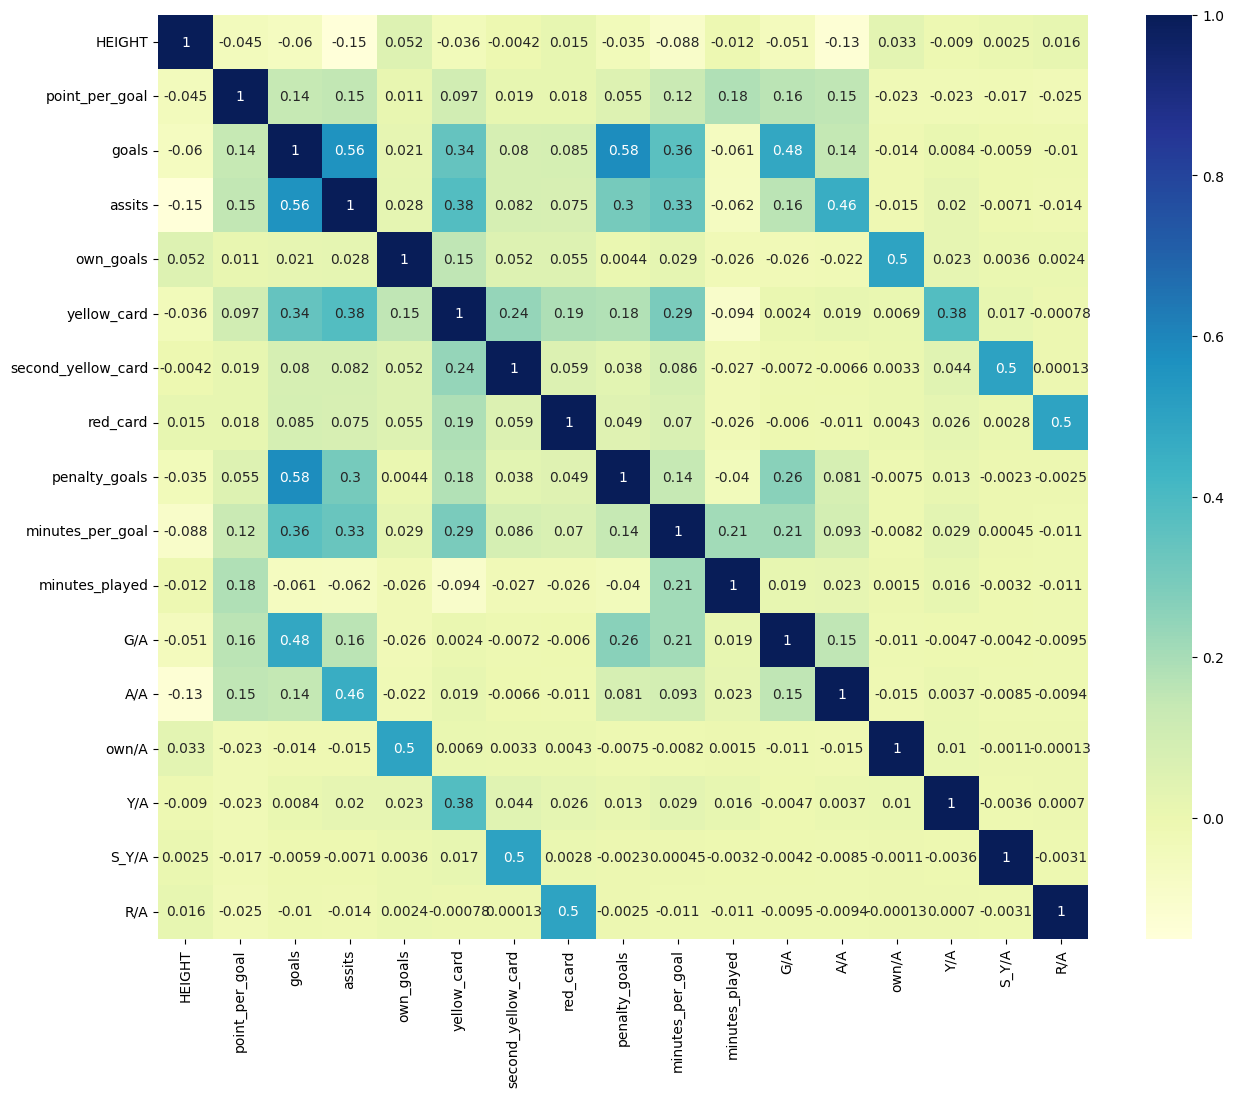

In [28]:
fig,ax=plt.subplots(figsize=(15,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [29]:
df.isna().sum()

ID                        0
HEIGHT                    0
point_per_goal            0
goals                     0
assits                    0
own_goals                 0
yellow_card               0
second_yellow_card        0
red_card                  0
penalty_goals             0
minutes_per_goal          0
minutes_played            0
position                  0
G/A                   25709
A/A                   25708
own/A                 25710
Y/A                   25644
S_Y/A                 25709
R/A                   25679
dtype: int64

In [30]:
hf=df[df['G/A'].isna()==True]

In [31]:
hf['goals'].value_counts()

0.00    25709
Name: goals, dtype: int64

In [32]:
df.shape

(257021, 19)

In [33]:
df.dropna(inplace=True)

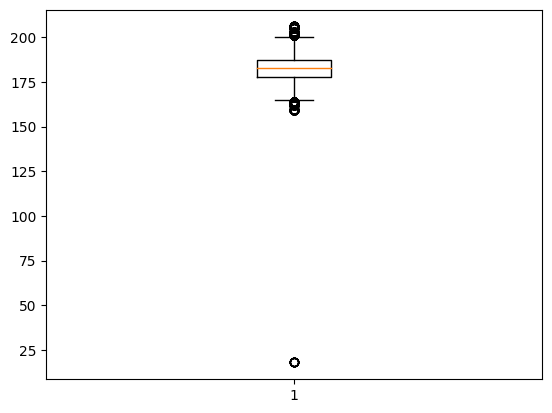

In [34]:
fig, ax = plt.subplots()
ax.boxplot(df['HEIGHT'])
plt.show()

In [35]:
len(df[df['HEIGHT']<160])

89

In [36]:
df=df[df['HEIGHT']>=160]

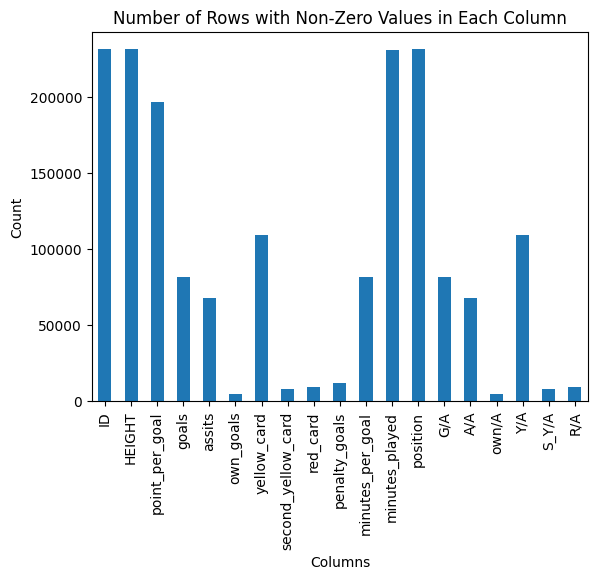

In [37]:
non_zero_counts = (df != 0).sum()
non_zero_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Number of Rows with Non-Zero Values in Each Column')
plt.show()

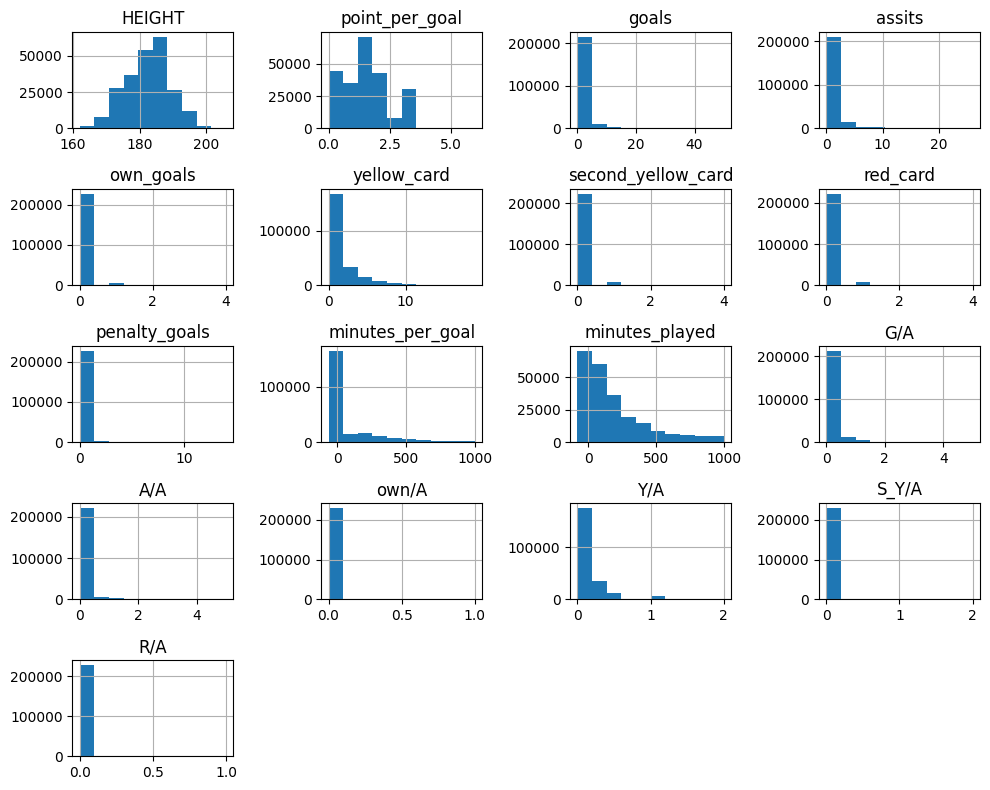

In [38]:
fig, axes = plt.subplots(figsize=(10, 8))
df.hist(ax=axes)
plt.tight_layout()
plt.show()

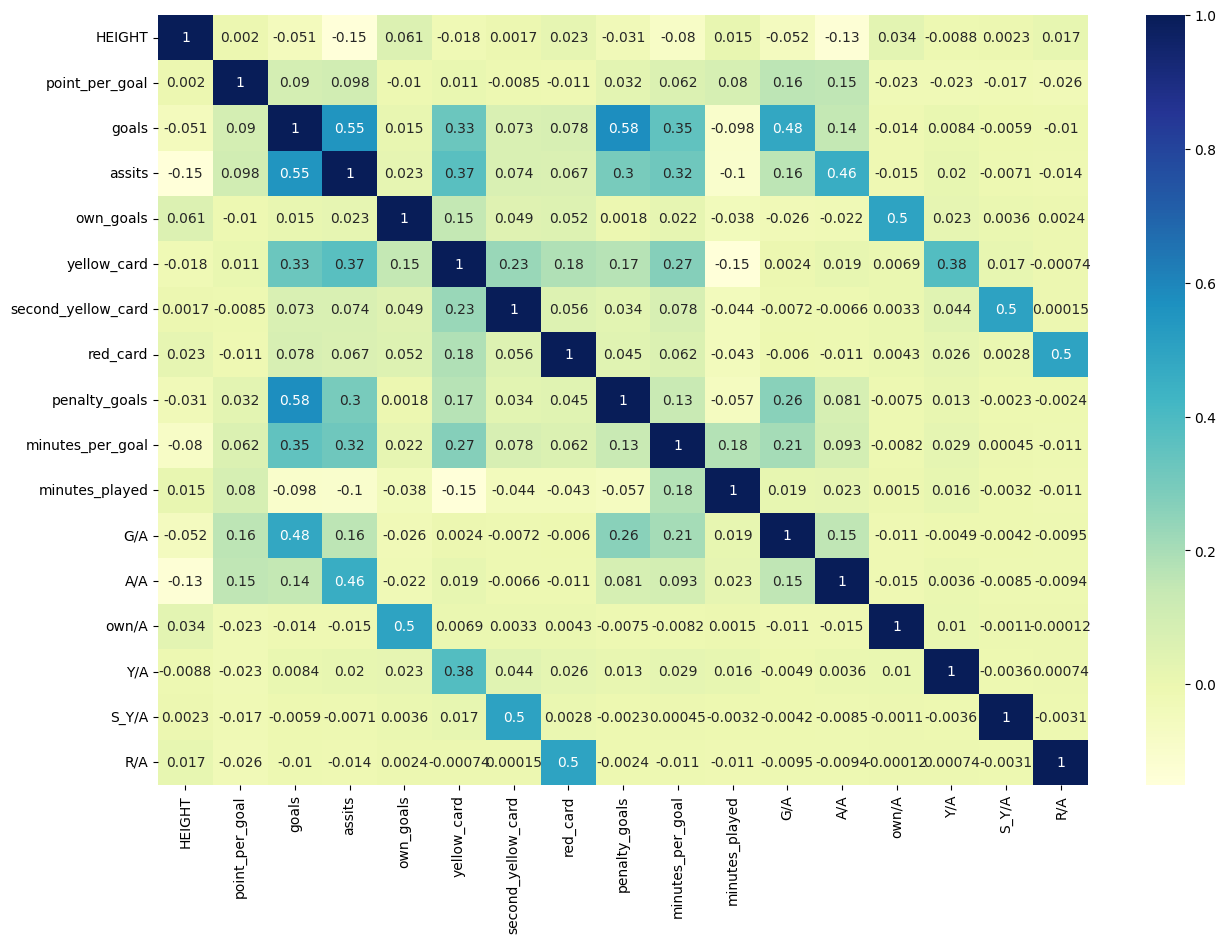

In [39]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [40]:
df.columns

Index(['ID', 'HEIGHT', 'point_per_goal', 'goals', 'assits', 'own_goals',
       'yellow_card', 'second_yellow_card', 'red_card', 'penalty_goals',
       'minutes_per_goal', 'minutes_played', 'position', 'G/A', 'A/A', 'own/A',
       'Y/A', 'S_Y/A', 'R/A'],
      dtype='object')

In [41]:
# df.drop(['goals', 'assits', 'own_goals','yellow_card', 'second_yellow_card', 'red_card'],axis=1,inplace=True)

In [42]:
# fig,ax=plt.subplots(figsize=(15,10))
# corrMatrix = df.corr()
# sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
# plt.show()

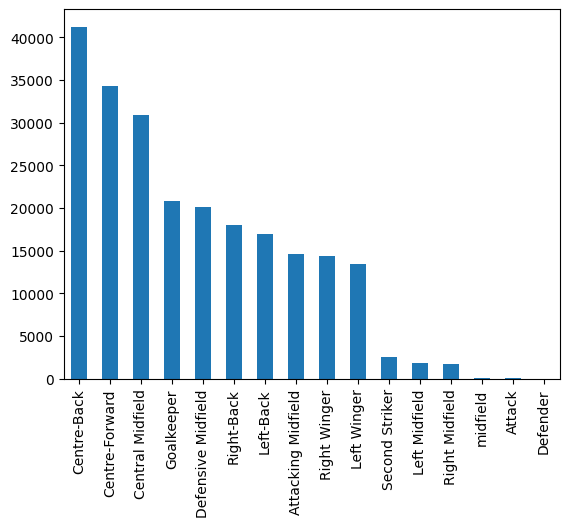

In [43]:
df['position'].value_counts().plot(kind='bar')
plt.show()

In [44]:
df['role'] = df['position'].apply(lambda x: 'defender' if 'Back' in x or 'Defender' in x else ('midfield' if 'Midfield' in x or 'midfield' in x else ('forward' if 'Winger' in x or 'Forward' in x or 'Striker' in x or 'Attack' in x else 'Goalkeeper')))

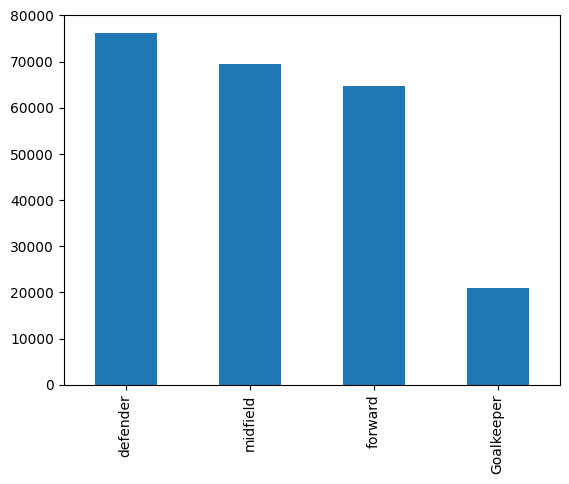

In [45]:
df['role'].value_counts().plot(kind='bar')
plt.show()

In [46]:
df.drop(df[df['role'] == 'Goalkeeper'].index, inplace=True)

In [47]:
df.loc[df['role']=='defender','role_numeric']=-1
df.loc[df['role']=='forward','role_numeric']=0
df.loc[df['role']=='midfield','role_numeric']=1

In [48]:
df['role_numeric'].value_counts()

-1.00    76241
1.00     69420
0.00     64687
Name: role_numeric, dtype: int64

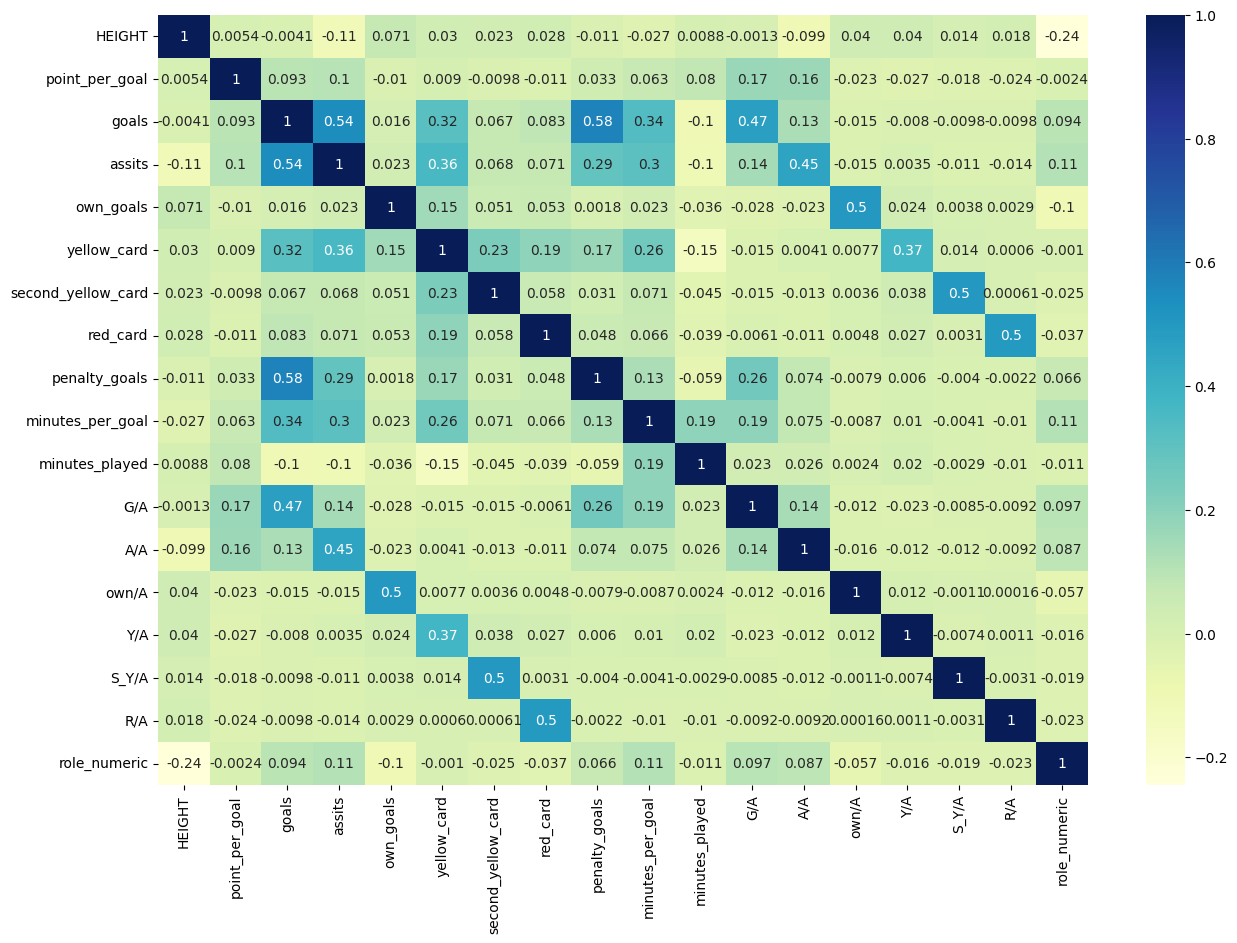

In [49]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [50]:
df=df.sample(frac=1,ignore_index=True)

In [51]:
X=df.drop(['ID','position','role','role_numeric'],axis=1)
y=df['role_numeric']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
std_scalar=StandardScaler()
train_x=std_scalar.fit_transform(X_train)
test_x=std_scalar.transform(X_test)

In [54]:
# selected_models = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'KNeighborsClassifier',
#                    'GaussianNB']

# # Create and fit the LazyClassifier with the selected models
# classify = [cls for cls in lazypredict.Supervised.CLASSIFIERS if cls[0] in selected_models]
# cls = LazyClassifier(verbose=0,classifiers=classify,custom_metric=None)
# models, predictions = cls.fit(X_train, X_val, y_train, y_val)


In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_x, y_train)

KNeighborsClassifier()

In [56]:
y_hat=neigh.predict(test_x)

In [57]:
y_hat

array([ 0., -1.,  1., ...,  0., -1., -1.])

In [58]:
from sklearn.metrics import precision_score
precision_score(y_test,y_hat,average='micro')

0.5289755169954837

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()


In [60]:
RF.fit(train_x, y_train)

RandomForestClassifier()

In [61]:
y_hat_2=RF.predict(test_x)

In [62]:
y_hat_2

array([ 0., -1.,  1., ...,  1.,  1., -1.])

In [63]:
from sklearn.metrics import precision_score
precision_score(y_test,y_hat_2,average='micro')

0.5607558830520561

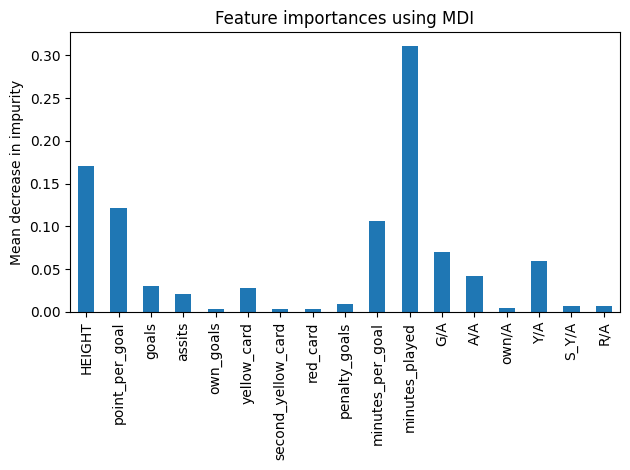

In [64]:
importances = RF.feature_importances_
forest_importances = pd.Series(importances,X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


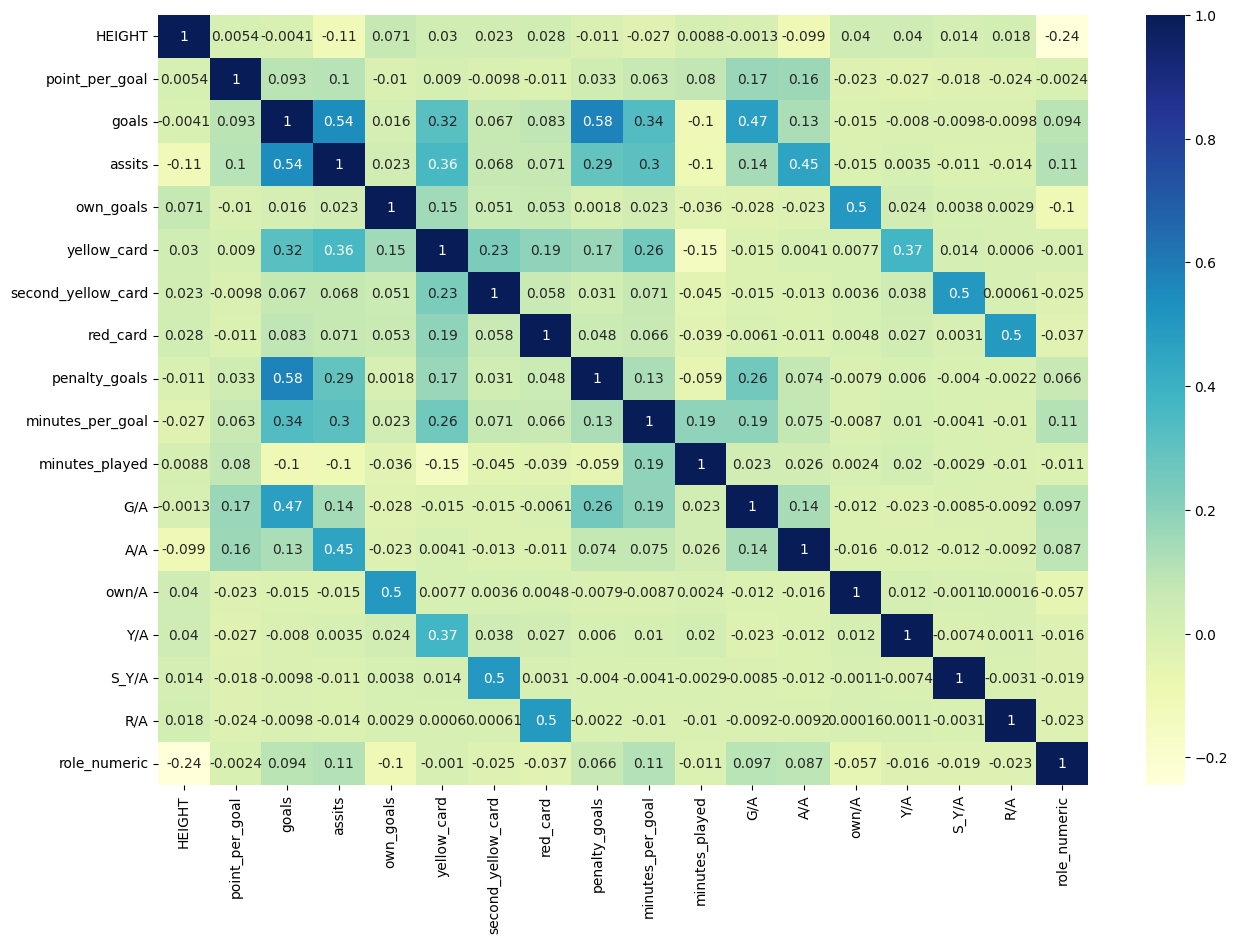

In [65]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [67]:
X.drop(['own_goals','second_yellow_card','red_card','penalty_goals','own/A','S_Y/A','R/A','goals','assits'],axis=1,inplace=True)

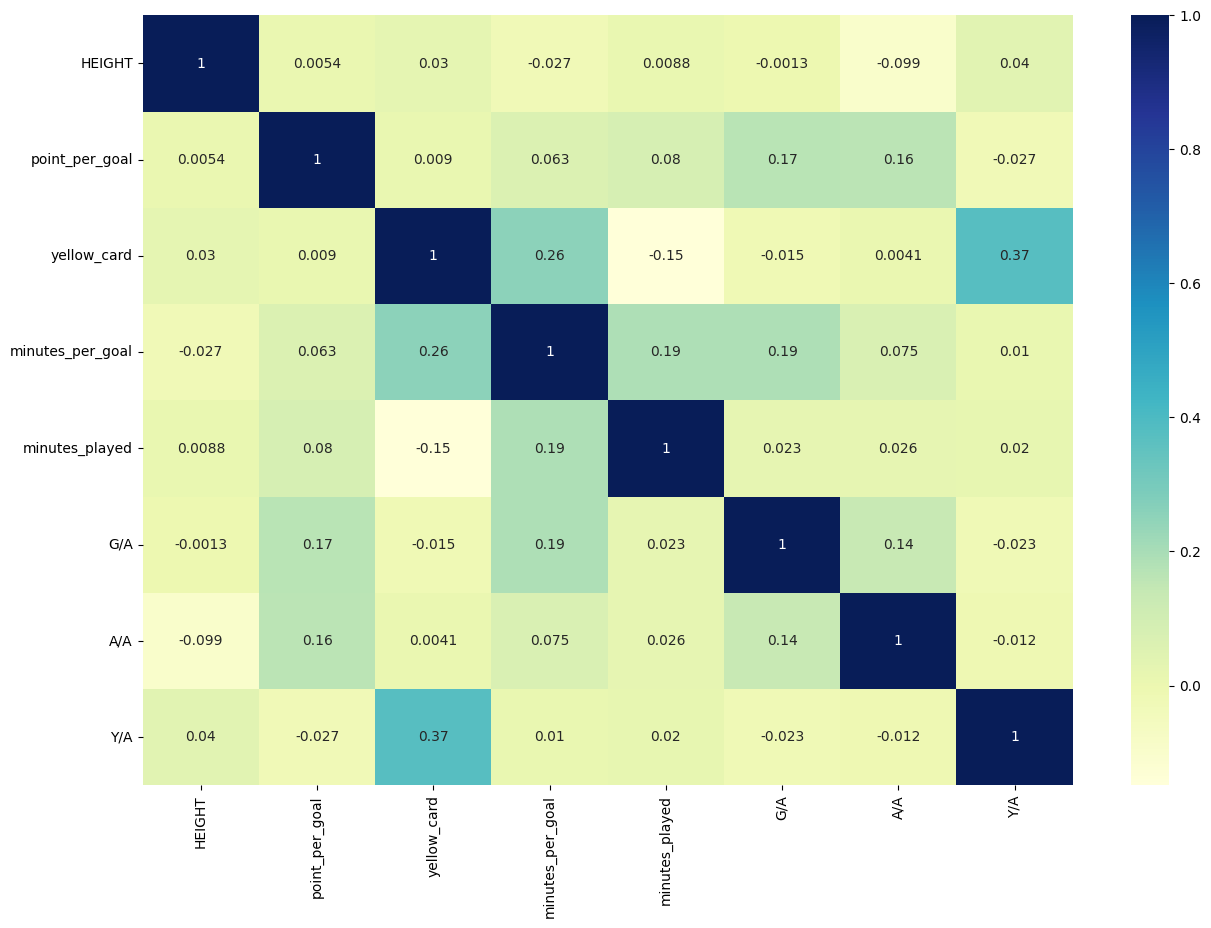

In [68]:
fig,ax=plt.subplots(figsize=(15,10))
corrMatrix = X.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
std_scalar=StandardScaler()
train_x=std_scalar.fit_transform(X_train)
test_x=std_scalar.transform(X_test)

In [71]:
from sklearn.ensemble import RandomForestClassifier
RF_2 = RandomForestClassifier()


In [72]:
RF_2.fit(train_x,y_train)

RandomForestClassifier()

In [73]:
y_hat2=RF_2.predict(test_x)

In [74]:
from sklearn.metrics import precision_score
precision_score(y_test,y_hat2,average='micro')

0.5569764677917756

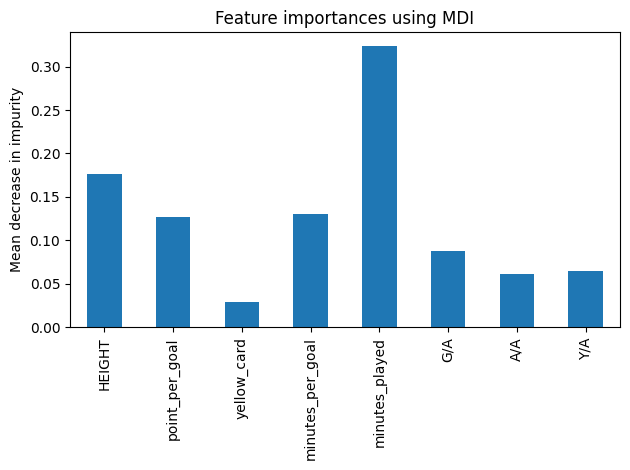

In [75]:
importances = RF_2.feature_importances_
forest_importances = pd.Series(importances,X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat2)

array([[10293,  1693,  3358],
       [ 2001,  7531,  3455],
       [ 4396,  3735,  5608]], dtype=int64)

In [93]:
df.columns

Index(['ID', 'HEIGHT', 'point_per_goal', 'goals', 'assits', 'own_goals',
       'yellow_card', 'second_yellow_card', 'red_card', 'penalty_goals',
       'minutes_per_goal', 'minutes_played', 'position', 'G/A', 'A/A', 'own/A',
       'Y/A', 'S_Y/A', 'R/A', 'role', 'role_numeric'],
      dtype='object')

In [94]:
hf = df[['HEIGHT', 'point_per_goal', 'minutes_per_goal', 'minutes_played', 'G/A','role_numeric']]

In [96]:
X=hf.drop(['role_numeric'],axis=1)
y=hf['role_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
std_scalar=StandardScaler()
train_x=std_scalar.fit_transform(X_train)
test_x=std_scalar.transform(X_test)

In [103]:
from sklearn.ensemble import RandomForestClassifier
RF_3 = RandomForestClassifier(n_estimators=1000)

In [104]:
RF_3.fit(train_x,y_train)

RandomForestClassifier(n_estimators=1000)

In [105]:
y_hat=RF_3.predict(test_x)

In [106]:
from sklearn.metrics import precision_score
precision_score(y_test,y_hat,average='micro')

0.5444497266460661

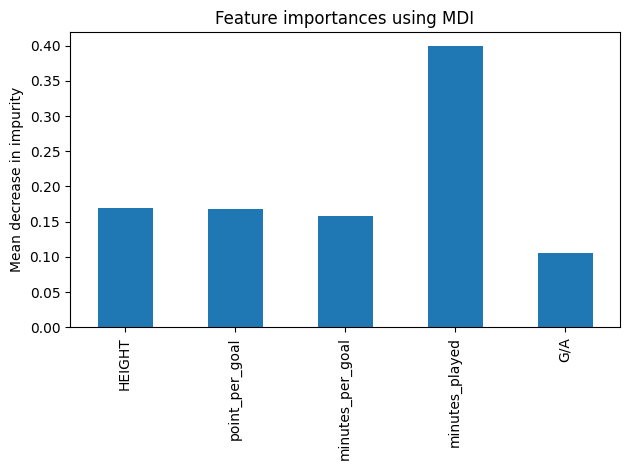

In [107]:
importances = RF_3.feature_importances_
forest_importances = pd.Series(importances,X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
